In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
os.chdir('/data/lola/shockle/data_for_paper_attempt2/')

In [4]:
trace_a = pickle.load(open('earm_mtdreamzs_3chain_a_psostart.p'))
trace_b = pickle.load(open('earm_mtdreamzs_3chain_b_psostart.p'))
trace_c = pickle.load(open('earm_mtdreamzs_3chain_c_psostart.p'))
trace_d = pickle.load(open('earm_mtdreamzs_3chain_d_psostart.p'))

In [5]:
trace_a_error = {}
trace_b_error = {}
trace_c_error = {}
trace_d_error = {}
for key in ['momp', 'icrp', 'ecrp']:
    trace_a_error[key] = trace_a[key]
    trace_b_error[key] = trace_b[key]
    trace_c_error[key] = trace_c[key]
    trace_d_error[key] = trace_d[key]

In [6]:
for key in ['momp', 'icrp', 'ecrp']:
    del trace_a[key]
    del trace_b[key]
    del trace_c[key]
    del trace_d[key]

In [7]:
param_trace_a = convert_param_vec_dict_to_param_dict(trace_a, model.parameters_rules())
param_trace_b = convert_param_vec_dict_to_param_dict(trace_b, model.parameters_rules())
param_trace_c = convert_param_vec_dict_to_param_dict(trace_c, model.parameters_rules())
param_trace_d = convert_param_vec_dict_to_param_dict(trace_d, model.parameters_rules())

In [8]:
os.chdir('/home/shockle/moo_and_mcmc/emcee/')

In [9]:
from earm_uniform_emcee import log_post

creating /tmp/scipy-shockle-S69amV/python27_intermediate/compiler_adb0dcdd12b567e1f52eaef511e3b408


In [10]:
for trace in [trace_a, trace_b, trace_c, trace_d]:
    for chain in range(len(trace_a['params'])):
        log_post(trace['params'][chain][-1])

prior:  -282.479411206  like:  -809.77792234  post:  -1092.25733355
prior:  -282.479411206  like:  -807.331314536  post:  -1089.81072574
prior:  -282.479411206  like:  -795.987123424  post:  -1078.46653463
prior:  -282.479411206  like:  -797.386413579  post:  -1079.86582479
prior:  -282.479411206  like:  -788.965350391  post:  -1071.4447616
prior:  -282.479411206  like:  -796.580091047  post:  -1079.05950225
prior:  -282.479411206  like:  -811.16188342  post:  -1093.64129463
prior:  -282.479411206  like:  -787.93646482  post:  -1070.41587603
prior:  -282.479411206  like:  -780.408946539  post:  -1062.88835775
prior:  -282.479411206  like:  -725.07798643  post:  -1007.55739764
prior:  -282.479411206  like:  -727.596143271  post:  -1010.07555448
prior:  -282.479411206  like:  -718.302942702  post:  -1000.78235391


In [11]:
print_convergence_summary(param_trace_a)

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  105  of  105  parameters.
Percent of parameters with GR below 1.1:  100.0


[105, 100.0, 105, 100.0]

In [12]:
print_convergence_summary(param_trace_b)

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  105  of  105  parameters.
Percent of parameters with GR below 1.1:  100.0


[105, 100.0, 105, 100.0]

In [13]:
print_convergence_summary(param_trace_c)

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  104  of  105  parameters.
Percent of parameters with GR below 1.1:  99.0476190476


[105, 100.0, 104, 99.04761904761905]

In [14]:
print_convergence_summary(param_trace_d)

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  104  of  105  parameters.
Percent of parameters with GR below 1.1:  99.0476190476


[105, 100.0, 104, 99.04761904761905]

60000
3
60000


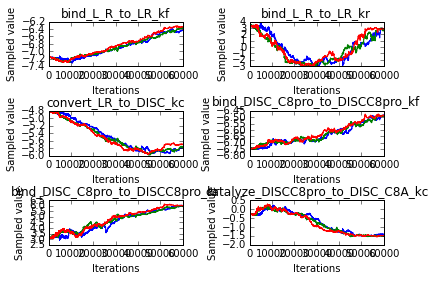

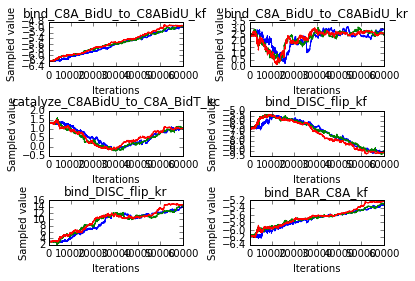

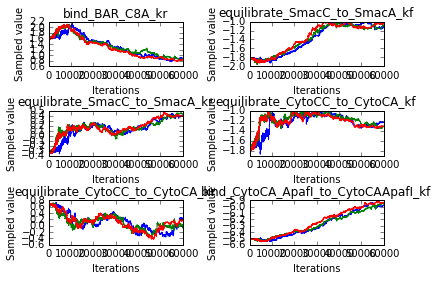

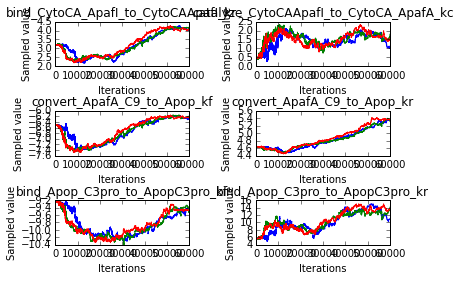

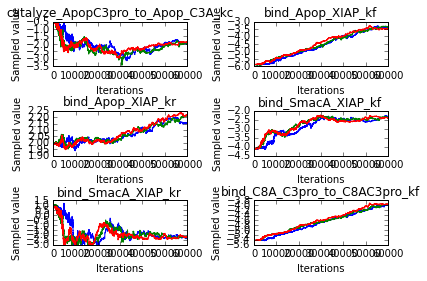

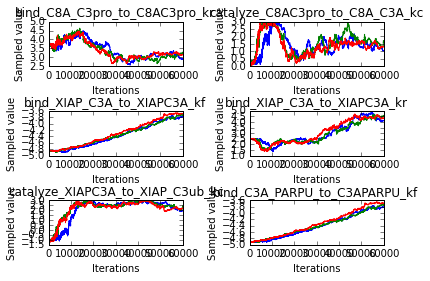

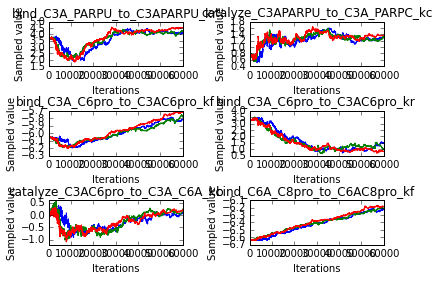

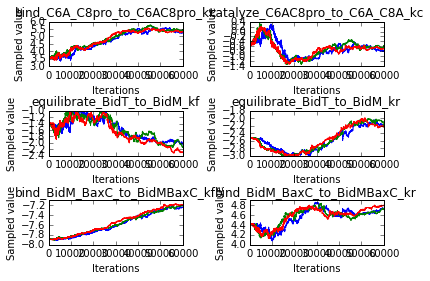

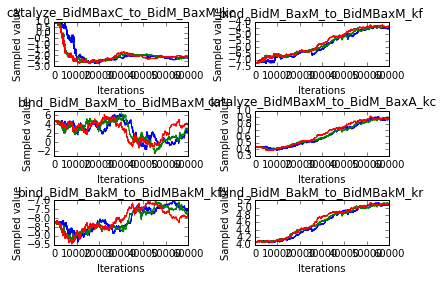

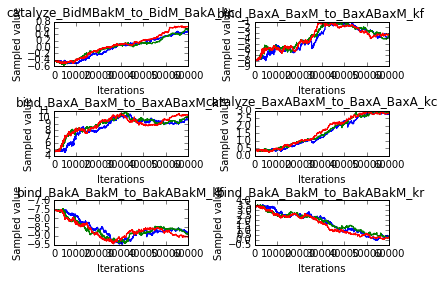

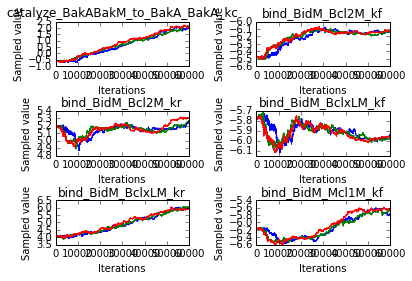

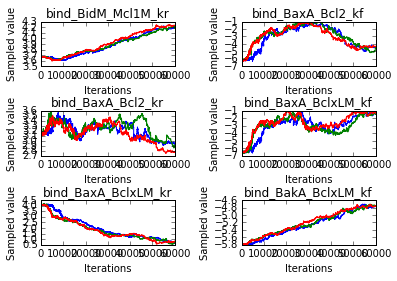

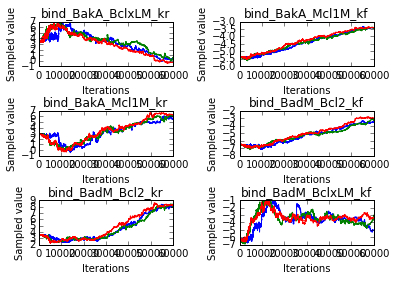

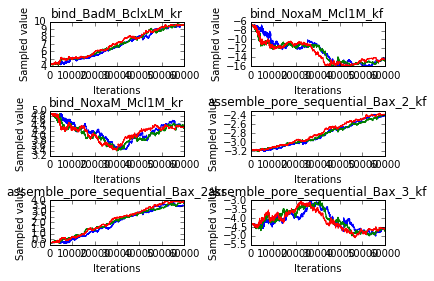

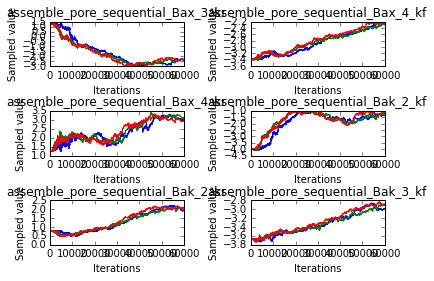

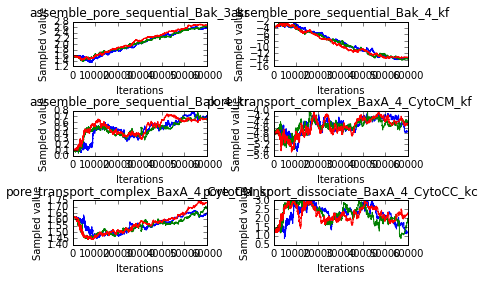

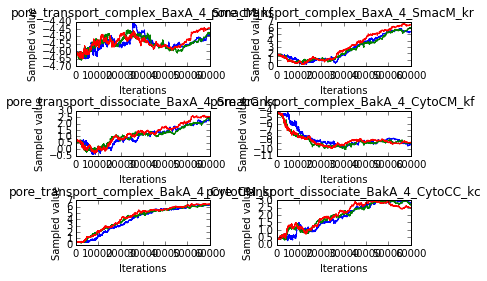

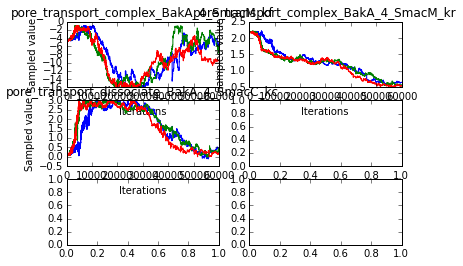

In [15]:
sample_plots(param_trace_a)

In [16]:
trace_arr_a = create_trace_matrix(param_trace_a, burnin=50000)
trace_arr_b = create_trace_matrix(param_trace_b, burnin=50000)
trace_arr_c = create_trace_matrix(param_trace_c, burnin=50000)
trace_arr_d = create_trace_matrix(param_trace_d, burnin=50000)

In [17]:
np.save('earm_mtdreamzs_3chain_psostart_a_tracearr.npy', trace_arr_a)
np.save('earm_mtdreamzs_3chain_psostart_b_tracearr.npy', trace_arr_b)
np.save('earm_mtdreamzs_3chain_psostart_c_tracearr.npy', trace_arr_c)
np.save('earm_mtdreamzs_3chain_psostart_d_tracearr.npy', trace_arr_d)

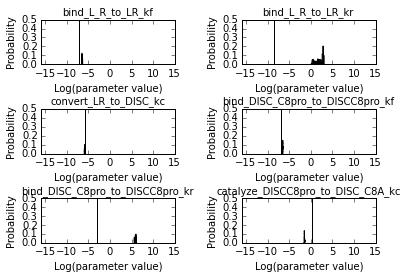

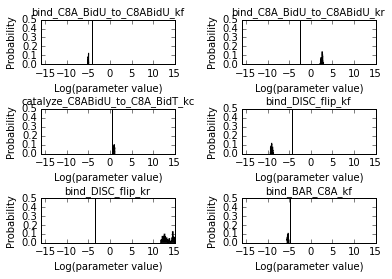

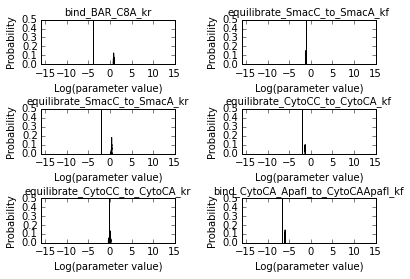

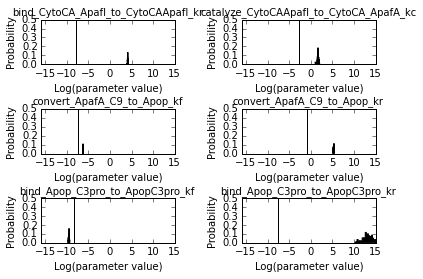

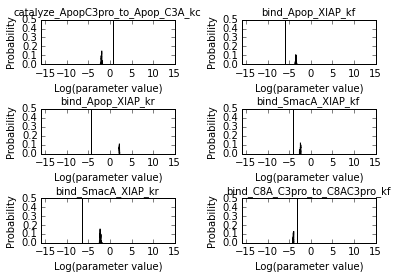

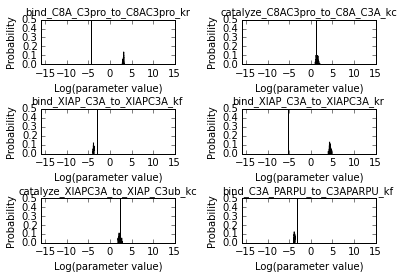

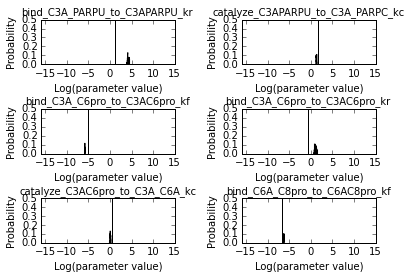

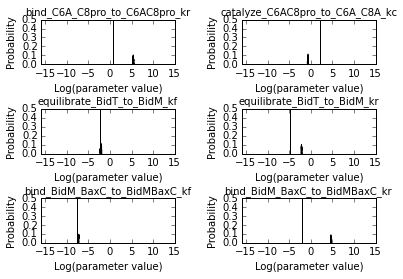

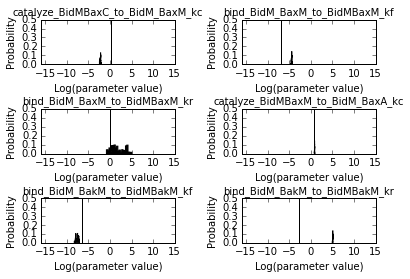

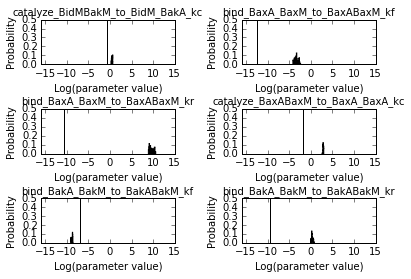

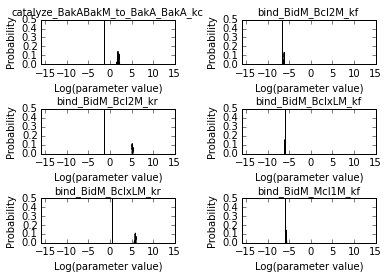

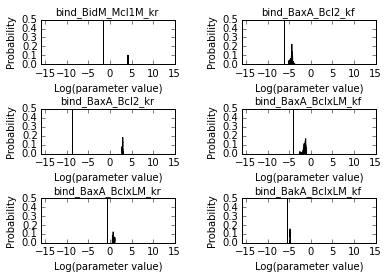

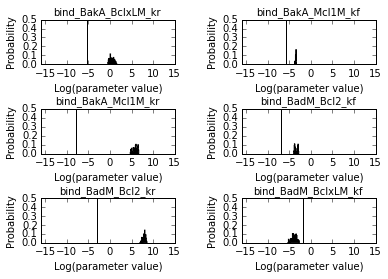

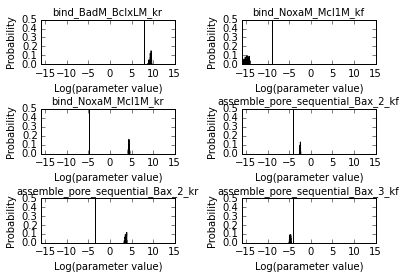

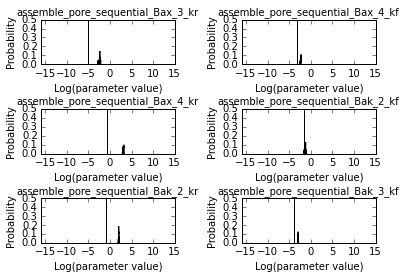

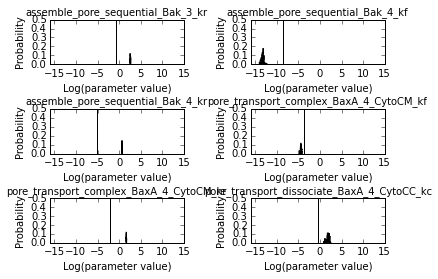

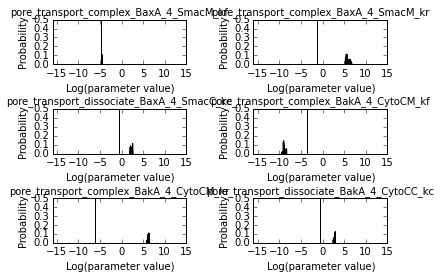

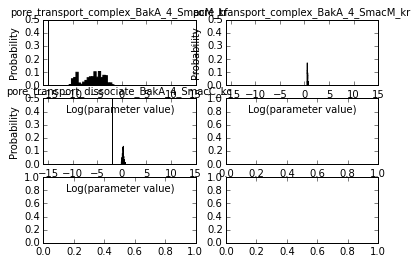

In [18]:
hists_a, axes_a = plot_histograms(param_trace_a, trace_arr_a, plot_original_vals=True, model=model, title_fontsize=10, bins=20)